# Plot minimum disorder 

Plotting the minimum disorder for each basins.
MRSO

In [1]:
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import os, glob
import seaborn as sns
import pandas as pd
import math
import cmcrameri.cm as cmc
import rasterio
import re
from matplotlib.offsetbox import AnchoredText
import pickle
import itertools
from functions_statistics_gradients import *
import helplotlib
import re
from matplotlib.ticker import StrMethodFormatter
import pickle


In [2]:
def load_data(file_path, ss_case, rain_grad):
    rain_grad = f'{rain_grad}'
    #print(rain_grad)
    with open(file_path + f'min_disorder__ss_{ss_case}_chi_{rain_grad}.pkl', 'rb') as f:
        min_disorder = pickle.load(f)
    return min_disorder

## Drainage Area

In [44]:
base_path = '/exports/csce/datastore/geos/users/s1440040/projects/phd-fastscape/phd-fastscape/model_outputs_for_statistics/'

gradients = [0,1,2,3,4,5,6,7,8,9,10]
ss_case = ['da']#, 'discharge_grad_2' ,'discharge_grad_3', 'discharge_grad_4','discharge_grad_5', 'discharge_grad_6','discharge_grad_7', 'discharge_grad_8','discharge_grad_9', 'discharge_grad_10']


basin_counts = []
for i in range(len(ss_case)):
    rainfall_grad_basins = []
    list_min_disorder_rain = []
    list_min_disorder_no_rain = []
    basin_list = []
    full_base_path = base_path + f'ss_da_gradient/'
    for j in range(len(gradients)):
        #print(f'I have {len(gradients)} gradients')
        #print(f'ss case: {ss_case[i]}, gradient: {gradients[j]}')
        # CHI WITH RAIN

        min_disorder_rain = load_data(full_base_path, ss_case[i], f'grad_{gradients[j]}') # this is a list
        list_min_disorder_rain.append(min_disorder_rain)
        # CHI WITHOUT RAIN
        min_disorder_no_rain = load_data(full_base_path, ss_case[i], 'no_rain')
        list_min_disorder_no_rain.append(min_disorder_no_rain)
        #print()
        number_of_basins = len(min_disorder_rain)
        #basin_count.append(number_of_basins)
        #print(number_of_basins)
        grad_basins = [gradients[j]]*number_of_basins
        #print(grad_basins)
        rainfall_grad_basins.append(grad_basins)
        #full_list.append([grad_basins, list_min_disorder_no_rain,list_min_disorder_rain])
    flat_list_basins = [item for sublist in rainfall_grad_basins for item in sublist]
    #print(flat_list_basins)

flat_list_basins = [item for sublist in rainfall_grad_basins for item in sublist]
flat_list_rain = [item for sublist in list_min_disorder_rain for item in sublist]
flat_list_no_rain = [item for sublist in list_min_disorder_no_rain for item in sublist]

df_min_disorder = pd.DataFrame(list(zip(flat_list_no_rain, flat_list_rain, flat_list_basins)), columns=['chi_no_rain', 'chi_rain', 'rain_grad'])


In [45]:
df_min_disorder_melted = df_min_disorder.melt(id_vars=["rain_grad"], 
        var_name="chi_type", 
        value_name="Min_disorder")

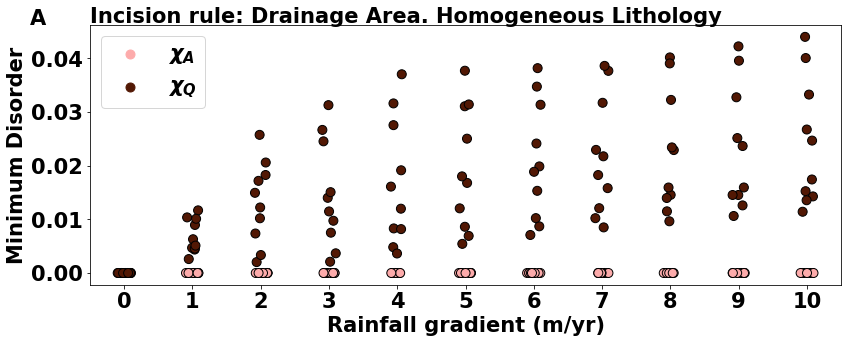

In [46]:
plt.rcParams['legend.title_fontsize'] = 12
fig, ax = helplotlib.mkfig_simple_bold(fontsize_major = 21, fontsize_minor = 14, family = "DejaVu Sans" , figsize = (12,5))
sns.stripplot(data=df_min_disorder_melted, x='rain_grad', y='Min_disorder', hue = 'chi_type',edgecolor="black",
              s=9,
              linewidth=1,
              palette = [cmc.berlin.colors[int(-256/100)],cmc.berlin.colors[int(-256/3)]])
plt.xlabel('Rainfall gradient (m/yr)')
plt.ylabel('Minimum Disorder')
props = dict(boxstyle='round', facecolor='white', alpha=0)

# place a text box in upper left in axes coords
ax.text(0.0, 1.07, 'Incision rule: Drainage Area. Homogeneous Lithology', transform=ax.transAxes, fontsize=21,
        verticalalignment='top', bbox=props)

leg = plt.legend(loc='upper left', labels=[r'$\it{\chi_{A}}$', r'$\it{\chi_{Q}}$'], fontsize=21)

leg.legendHandles[0].set_color(cmc.berlin.colors[int(-256/100)])
leg.legendHandles[1].set_color(cmc.berlin.colors[int(-256/3)])
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.tight_layout()
ax.text(-0.08, 1, 'A', transform=ax.transAxes, 
            size=21, weight='bold')
plt.savefig(base_path + 'da_min_disorder_chi.pdf', dpi = 400)

## Discharge

In [37]:
basin_counts = []
ss_case = ['discharge_grad_0','discharge_grad_1', 'discharge_grad_2' ,'discharge_grad_3', 'discharge_grad_4','discharge_grad_5', 'discharge_grad_6','discharge_grad_7', 'discharge_grad_8','discharge_grad_9', 'discharge_grad_10']
gradients = [0,1,2,3,4,5,6,7,8,9,10]
basin_list = []
rainfall_grad_basins = []
list_min_disorder_rain = []
list_min_disorder_no_rain = []
for i in range(len(ss_case)):
    full_base_path = base_path + f'ss_discharge_gradient/'
    grad_number = re.findall(r'\d+', ss_case[i])
    gradients = [grad_number[0]]
    for j in range(len(gradients)):
        #print(f'I have {len(gradients)} gradients')
        #print(f'ss case: {ss_case[i]}, gradient: {gradients[j]}')
        
        # CHI WITH RAIN
        min_disorder_rain = load_data(full_base_path, ss_case[i], f'grad_{gradients[j]}') # this is a list
        list_min_disorder_rain.append(min_disorder_rain)
        #print(list_min_disorder_rain)
        
        # CHI WITHOUT RAIN
        min_disorder_no_rain = load_data(full_base_path, ss_case[i], 'no_rain')
        list_min_disorder_no_rain.append(min_disorder_no_rain)
        #print(list_min_disorder_no_rain)
        number_of_basins = len(min_disorder_rain)
        #basin_count.append(number_of_basins)
        grad_basins = [gradients[j]]*number_of_basins
        rainfall_grad_basins.append(grad_basins)
        #full_list.append([grad_basins, list_min_disorder_no_rain,list_min_disorder_rain])



In [38]:
flat_list_basins = [item for sublist in rainfall_grad_basins for item in sublist]
flat_list_rain = [item for sublist in list_min_disorder_rain for item in sublist]
flat_list_no_rain = [item for sublist in list_min_disorder_no_rain for item in sublist]

df_min_disorder = pd.DataFrame(list(zip(flat_list_no_rain, flat_list_rain, flat_list_basins)), columns=['chi_no_rain', 'chi_rain', 'rain_grad'])


In [39]:
df_min_disorder_melted = df_min_disorder.melt(id_vars=["rain_grad"], 
        var_name="chi_type", 
        value_name="Min_disorder")

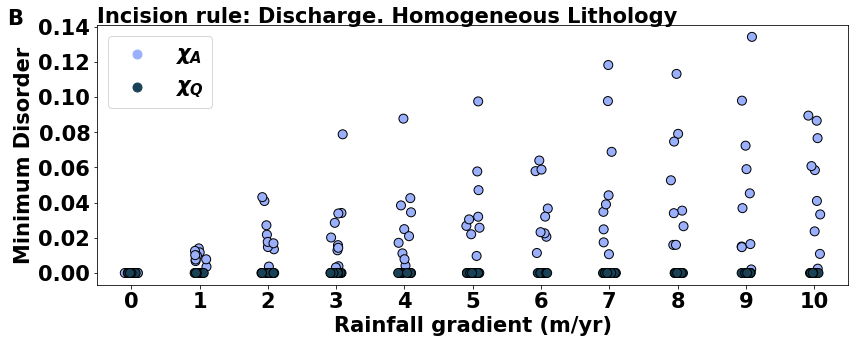

In [43]:
plt.rcParams['legend.title_fontsize'] = 12
fig, ax = helplotlib.mkfig_simple_bold(fontsize_major = 21, fontsize_minor = 14, family = "DejaVu Sans" , figsize = (12, 5))
sns.stripplot(data=df_min_disorder_melted, x='rain_grad', y='Min_disorder', hue = 'chi_type',edgecolor="black",
              s=9,
              linewidth=1,
              palette = [cmc.berlin.colors[int(256/100)],cmc.berlin.colors[int(256/3)]])
plt.xlabel('Rainfall gradient (m/yr)')
plt.ylabel('Minimum Disorder')
props = dict(boxstyle='round', facecolor='white', alpha=0)

# place a text box in upper left in axes coords
ax.text(0.0, 1.07, 'Incision rule: Discharge. Homogeneous Lithology', transform=ax.transAxes, fontsize=21,
        verticalalignment='top', bbox=props)

leg = plt.legend(loc='upper left', labels=[r'$\it{\chi_{A}}$', r'$\it{\chi_{Q}}$'], fontsize=21)

leg.legendHandles[0].set_color(cmc.berlin.colors[int(256/100)])
leg.legendHandles[1].set_color(cmc.berlin.colors[int(256/3)])
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
ax.text(-0.12, 1, 'B', transform=ax.transAxes, 
            size=21, weight='bold')
plt.tight_layout()
plt.savefig(base_path + 'discharge_min_disorder_chi.pdf', dpi = 400)